In [111]:
from utils import *
from PanoramaGenerator import generator
from ColorCorrection import correction, vibrancyscore
import cv2
from stabEval import plot_frame_transformations
import matplotlib.pyplot as plt

In [112]:
input_file = './videos/1.MOV'
color_enhancements = True
stab = True

In [113]:
if stab:
    frames = video_reader(input_file)
    processed_frames,scene_changes = stabilization(input_file, "./processing/tmp.mp4")
    sampled_frames = frame_sampling(processed_frames,scene_changes)
    video_rendering(sampled_frames,"./processing/tmp.mp4")
    processed_frames, _ = stabilization("./processing/tmp.mp4", "./processing/output.mp4")
    
    print(f'Sampling reduced {len(frames)} number of frames of the original video to {len(sampled_frames)} frames.')

Sampling reduced 165 number of frames of the original video to 39 frames.


In [114]:
if not color_enhancements and stab:
    pano = generator.generate_pano("./processing/output.mp4", 'eval.png')

elif color_enhancements and stab:
    reference_frame, _ = vibrancyscore.select_vibrant_frame("./processing/output.mp4")
    ce_frames = correction.color_enhancement_pipeline("./processing/output.mp4", reference_frame)
    video_rendering(ce_frames,"./processing/output_color.mp4")
    pano = generator.generate_pano("./processing/output_color.mp4", 'eval.png')

#Will take long
elif color_enhancements and not stab:
    reference_frame, _ = vibrancyscore.select_vibrant_frame(input_file)
    ce_frames = correction.color_enhancement_pipeline(input_file, reference_frame)
    video_rendering(ce_frames,"./processing/output_color.mp4")
    pano = generator.generate_pano("./processing/output_color.mp4", 'eval.png')

# Will take extremely long.
elif not color_enhancements and not stab:
    pano = generator.generate_pano(input_file, 'eval.png') 

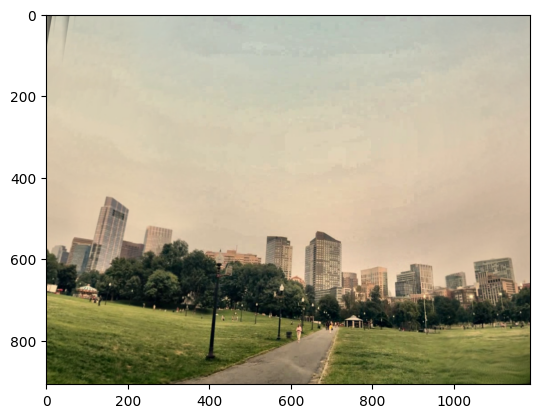

In [115]:
image = cv2.imread("eval.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)